In [1]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# TODO: sheet_name change
original_df = pd.read_excel('test.xlsx', sheet_name='Taxv3')
original_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Community,NaN,NaN,NaN,NaN,NaN,Governance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Membership,NaN,NaN,NaN,NaN,Meta Information,Token,NaN,...,Setup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,DAOs,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,...,Initial Airdrop,Initial Token Sale,NaN,NaN,NaN,RAW Token Holders,RAW Treasury Size,RAW Unique Active,Active quota,RAW Diversification / %GOV Token
4,1.0,Uniswap,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Uniswap,NaN,NaN,307800,1500000000,1200,0.389864,99.9
5,2.0,Compound,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Compound,NaN,NaN,193500,316700000,1000,0.516796,100
6,3.0,Aave,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Aave,NaN,NaN,129300,253400000,14300,11.059551,99.5
7,4.0,Badger,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Badger,NaN,NaN,33300,240000000,340,1.021021,85.2
8,5.0,SushiChef,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,SushiChef,NaN,NaN,9700,48800000,9700,100,96.6
9,6.0,Dxdao,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,...,No,Yes,Dxdao,NaN,NaN,527,69400000,217,41.176471,42


In [30]:
df = original_df.iloc[3:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:34]
df = df.iloc[:, 1:-8]
df

3,NaN,DAOs,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,...,Initial Airdrop,Initial Token Sale,NaN,NaN,NaN,RAW Token Holders,RAW Treasury Size,RAW Unique Active,Active quota,RAW Diversification / %GOV Token
4,1.0,Uniswap,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Uniswap,NaN,NaN,307800,1500000000,1200,0.389864,99.9
5,2.0,Compound,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Compound,NaN,NaN,193500,316700000,1000,0.516796,100
6,3.0,Aave,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Aave,NaN,NaN,129300,253400000,14300,11.059551,99.5
7,4.0,Badger,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Badger,NaN,NaN,33300,240000000,340,1.021021,85.2
8,5.0,SushiChef,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,SushiChef,NaN,NaN,9700,48800000,9700,100,96.6
9,6.0,Dxdao,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,...,No,Yes,Dxdao,NaN,NaN,527,69400000,217,41.176471,42
10,7.0,Yam Finance,Open,Community,No,Pseudonymous,Other Tokens,Product Building and Management,Singular,ERC20,...,Yes,No,Yam Finance,NaN,NaN,11300,3700000,156,1.380531,21
11,8.0,VitaDAO,Open,Decider,No,Anonymous,Other Tokens,Product Building and Management,Singular,ERC20,...,No,No,VitaDAO,NaN,NaN,830,11800000,107,12.891566,59
12,9.0,BanklessDAO,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,...,Yes,No,BanklessDAO,NaN,NaN,8500,7300000,2700,31.764706,87.1
13,10.0,Forefront,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,...,NaN,NaN,Forefront,NaN,NaN,13300,9700000,181,1.360902,82.2


In [8]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df).toarray())

In [9]:
clustering = AgglomerativeClustering(n_clusters=4).fit(encoder_df)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3])

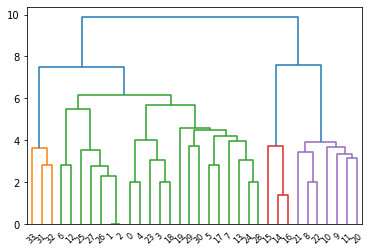

In [10]:
dend = shc.dendrogram(shc.linkage(encoder_df, method='ward'))

In [11]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(clustering.labels_):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
35,Open,Community,No,Pseudonymous,REP Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Allowlist,No,#Tokens Owned,None,Very,Yes,Services,Yes,No
36,Open,Community,Yes,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,Yes,Ownership,...,Automatic,None,No,#Tokens Owned,None,Very,Yes,Services,Yes,No
37,Open,Decider,Yes,Pseudonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,None,Yes,Per Individual,None,Very,Yes,Services,Yes,No


In [12]:
one_df.mode()

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
0,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,No,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN


In [13]:
per_zero = int(np.floor(len(zero_df)/31*100))
per_one = int(np.floor(len(one_df)/31*100))
per_two = int(np.floor(len(two_df)/31*100))
per_three = int(np.floor(len(three_df)/31*100))

In [14]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

,Cluster1: 67,Cluster2: 22,Cluster3: 9,Cluster4: 9
3,,,,
Access,Open,Token Ownership,Invitation,Open
Type,Profit from Tokens,Community,Decider,Community
Is hierachical,No,No,No,Yes
Anonymity,Anonymous,Pseudonymous,Known,Pseudonymous
Contributor Rewards,Other Tokens,Other Tokens,Governance Token,REP Token
Purpose,Product Building and Management,Community Building and Engagement,Investing or Fund Raising,Product Building and Management
Token Type,Singular,Singular,Singular,Singular
Primary Type,ERC20,ERC20,ERC20,ERC20
Supply Cap,Yes,Yes,Yes,Yes


In [15]:
final_df.to_excel('output_1.xlsx', sheet_name='Danke_Ingo')

In [55]:

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

ValueError: could not convert string to float: 'Uniswap'